<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [5]:
## Calculate the online purchase rates during online shopping sessions by customer type for November and December.
# Subset dataframe for November and December data
shopping_Nov_Dec = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

# Preview subset
print(shopping_Nov_Dec.head())

# Check unique months
print(shopping_Nov_Dec['Month'].unique())

# Get session frequency stats by CustomerType and Purchase
count_session = shopping_Nov_Dec.groupby(['CustomerType'])['Purchase'].value_counts()
print(count_session)

      SessionID  Administrative  ...        CustomerType  Purchase
5463       5464               1  ...        New_Customer       0.0
5464       5465               3  ...  Returning_Customer       1.0
5467       5468               4  ...  Returning_Customer       0.0
5479       5480               0  ...  Returning_Customer       1.0
5494       5495               0  ...  Returning_Customer       1.0

[5 rows x 15 columns]
['Nov' 'Dec']
CustomerType        Purchase
New_Customer        0.0          529
                    1.0          199
Returning_Customer  0.0         2994
                    1.0          728
Name: Purchase, dtype: int64


In [6]:
# Total number of session by CustomerType
total_new_customer = np.sum(count_session['New_Customer'])
total_returning_customer = np.sum(count_session['Returning_Customer'])

# Total number of purchase by CustomerType
purchase_new_customer = count_session[('New_Customer', 1)]
purchase_returning_customer = count_session[('Returning_Customer', 1)]

# Calculate purchase rates
purchase_rate_new = purchase_new_customer / total_new_customer
purchase_rate_returning = purchase_returning_customer / total_returning_customer

# Store purchase rates
purchase_rates = {"Returning_Customer": purchase_rate_returning, "New_Customer": purchase_rate_new}
print(purchase_rates)

{'Returning_Customer': 0.1955937667920473, 'New_Customer': 0.2733516483516483}


In [7]:
## Identify the strongest correlation in total time spent between different types of pages visited by the returning customers during the months of November and December. 
# Calculate correlation with pandas
cor_admin_info = shopping_Nov_Dec['Administrative_Duration'].corr(shopping_Nov_Dec['Informational_Duration'])
cor_admin_product = shopping_Nov_Dec['Administrative_Duration'].corr(shopping_Nov_Dec['ProductRelated_Duration'])
cor_product_info = shopping_Nov_Dec['ProductRelated_Duration'].corr(shopping_Nov_Dec['Informational_Duration'])

print(f"Administrative vs Informational: {cor_admin_info:.3f}")
print(f"Administrative vs ProductRelated: {cor_admin_product:.3f}")
print(f"ProductRelated vs Informational: {cor_product_info:.3f}")

Administrative vs Informational: 0.245
Administrative vs ProductRelated: 0.390
ProductRelated vs Informational: 0.367


In [8]:
# Store top correlation
top_correlation = {"pair": ('Administrative_Duration', 'ProductRelated_Duration'), "correlation": cor_admin_product}
print(top_correlation)

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.3898546003206963}


In [9]:
## A new campaign for the returning customers will boost the purchase rate by 15%. 
## What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers?

# Purchase is a binomial random variable taking the value of either 0 or 1
# We know that the current purchase rate for the returning customers is
print("Current purchase rate for returning customers:", purchase_rate_returning)

Current purchase rate for returning customers: 0.1955937667920473


In [10]:
# 15% Increase in this rate would be
increased_purchase_rate_returning = 1.15 * purchase_rate_returning
print("Increased purchase rate for returning customers:", increased_purchase_rate_returning)

Increased purchase rate for returning customers: 0.22493283181085436


In [11]:
# Calculate probability
prob_sales_100_less = stats.binom.cdf(k=100, n=500, p=increased_purchase_rate_returning)
prob_at_least_100_sales = 1 - prob_sales_100_less
print("Probability of having at least 100 sales out of 500 sessions:", prob_at_least_100_sales)

Probability of having at least 100 sales out of 500 sessions: 0.9012221339037267


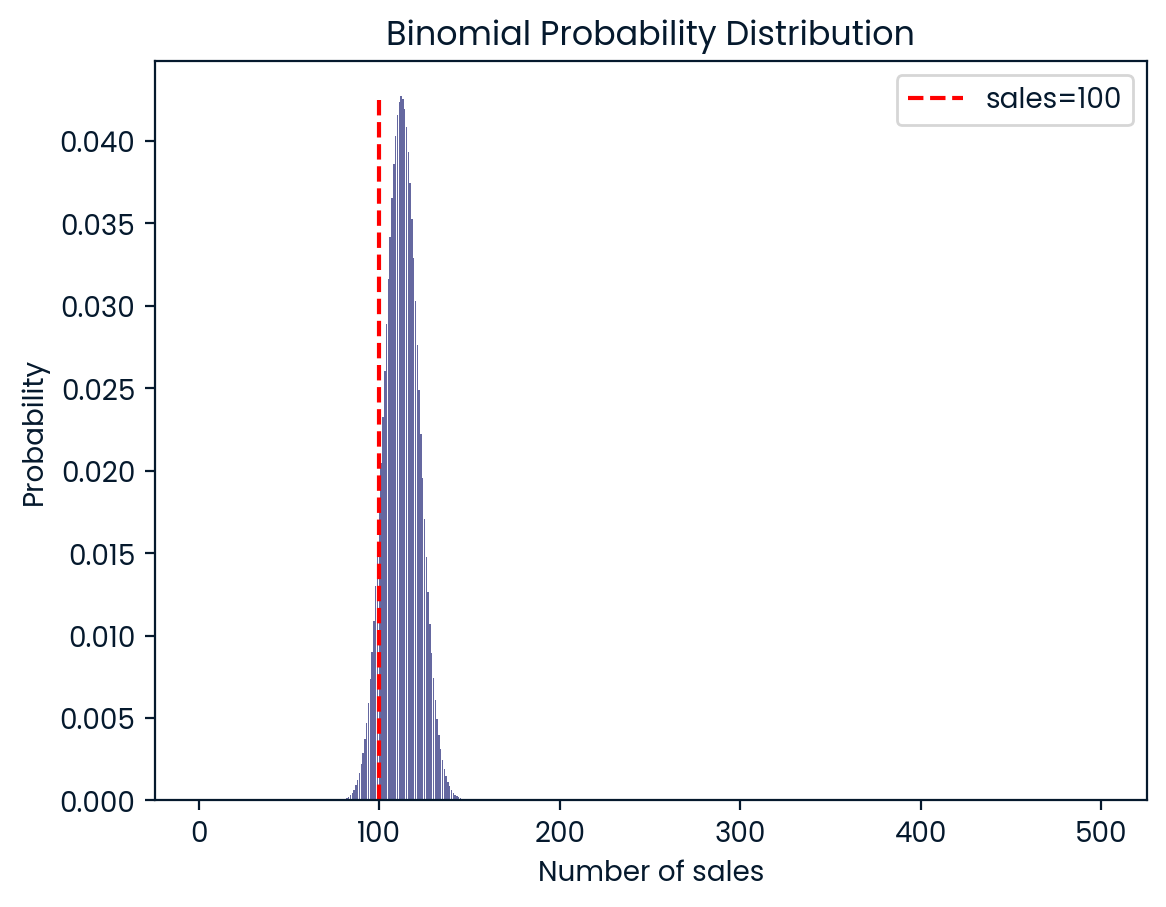

In [12]:
# Plotting the binomial probability distribution
n_sessions = 500
k_values = np.arange(500) + 1
p_binom_values = [stats.binom.pmf(k, n_sessions, increased_purchase_rate_returning) for k in k_values ] 
plt.bar(k_values, p_binom_values) 
plt.vlines(100, 0, max(p_binom_values), color='r', linestyle='dashed', label="sales=100")
plt.xlabel("Number of sales")
plt.ylabel("Probability")
plt.legend()
plt.title("Binomial Probability Distribution")
plt.show()